In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('tweets.csv')  

df.head()

id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [5]:
df.describe()


id        target
count  11370.000000  11370.000000
mean    5684.500000      0.185928
std     3282.380615      0.389066
min        0.000000      0.000000
25%     2842.250000      0.000000
50%     5684.500000      0.000000
75%     8526.750000      0.000000
max    11369.000000      1.000000

In [6]:
df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [7]:
# number of unique locations
unique_locations_count = df['location'].nunique()
print(f"Number of unique locations: {unique_locations_count}")
# number of missing locations grouped by target value
missing_row = df[df['location'].isnull()]
print("Number of missing rows by target:")
print(missing_row['target'].value_counts())


Number of unique locations: 4504
Number of missing rows by target:
target
0    2835
1     583
Name: count, dtype: int64


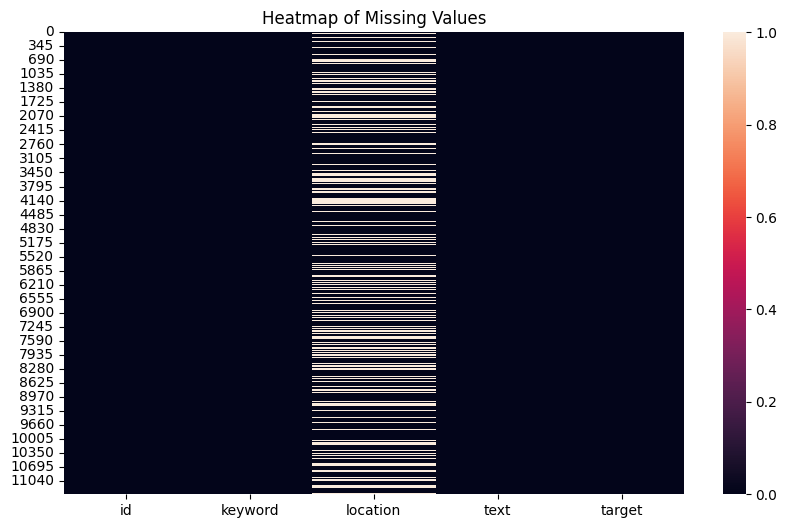

In [8]:
# Visualize missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title('Heatmap of Missing Values')
plt.show()


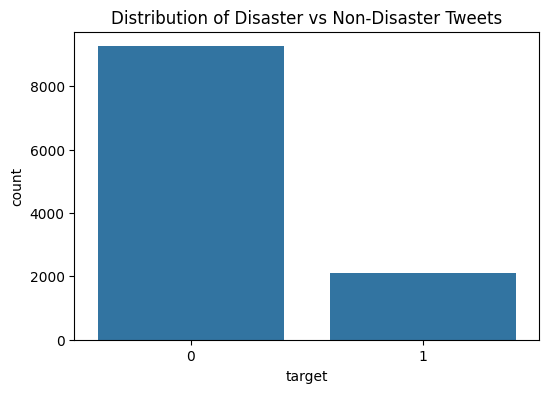

In [9]:
# distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target')
plt.title('Distribution of Disaster vs Non-Disaster Tweets')
plt.show()


Number of unique keywords: 219


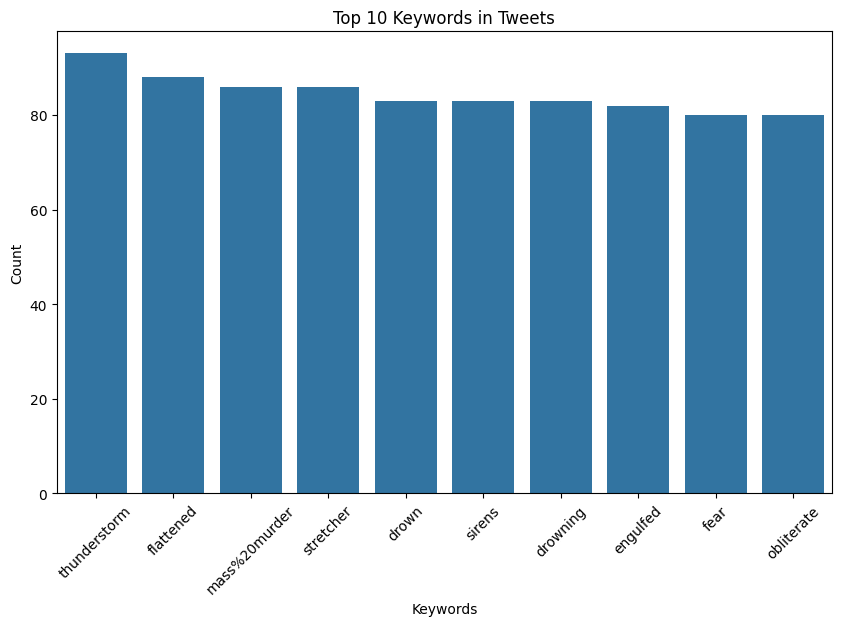

In [10]:
# number of unique keywords
print(f"Number of unique keywords: {df['keyword'].nunique()}")

# top 10 most common keywords
top_keywords = df['keyword'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_keywords.index, y=top_keywords.values)
plt.title('Top 10 Keywords in Tweets')
plt.ylabel('Count')
plt.xlabel('Keywords')
plt.xticks(rotation=45)
plt.show()


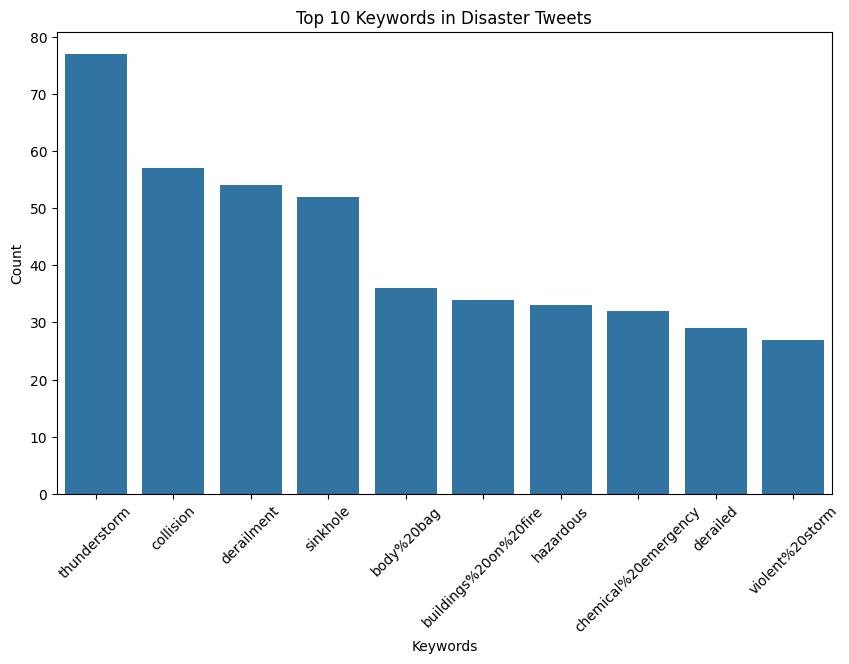

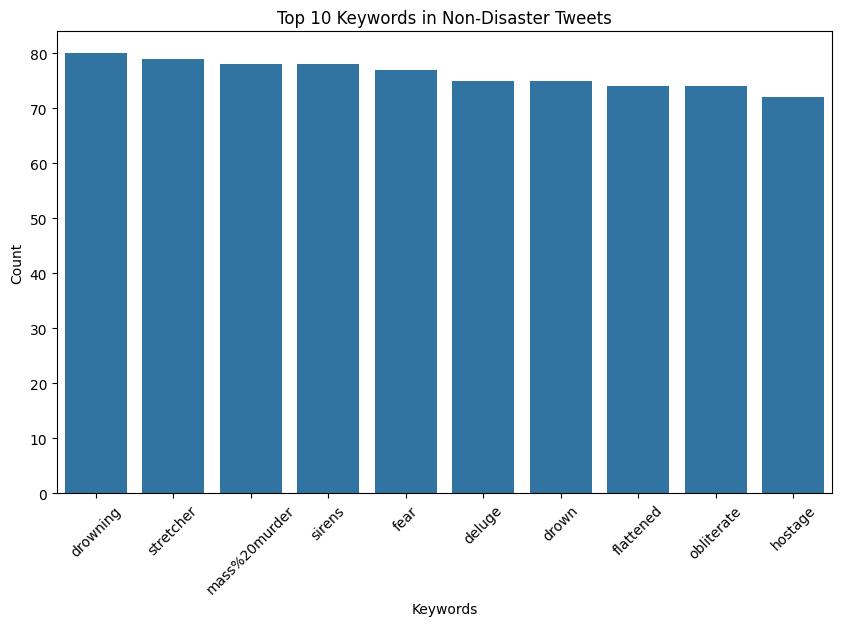

In [11]:
# top 10 keywords for disaster tweets
disaster_keywords = df[df['target'] == 1]['keyword'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=disaster_keywords.index, y=disaster_keywords.values)
plt.title('Top 10 Keywords in Disaster Tweets')
plt.ylabel('Count')
plt.xlabel('Keywords')
plt.xticks(rotation=45)
plt.show()

# top 10 keywords for non-disaster tweets
non_disaster_keywords = df[df['target'] == 0]['keyword'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=non_disaster_keywords.index, y=non_disaster_keywords.values)
plt.title('Top 10 Keywords in Non-Disaster Tweets')
plt.ylabel('Count')
plt.xlabel('Keywords')
plt.xticks(rotation=45)
plt.show()


Number of missing locations: 3418


C:\Users\vansh\AppData\Local\Temp\ipykernel_27584\4263270125.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('Unknown', inplace=True)


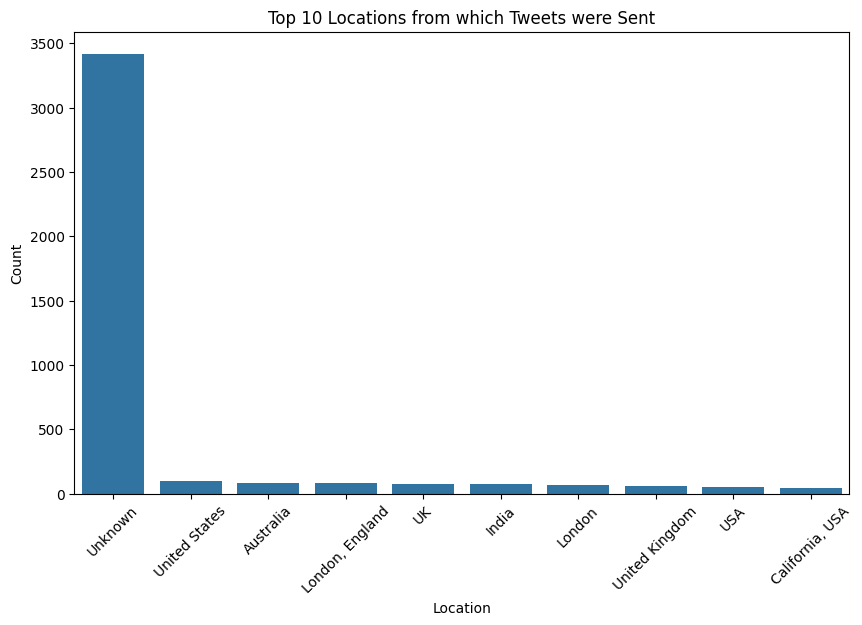

In [12]:
# how many locations are missing
missing_location = df['location'].isnull().sum()
print(f"Number of missing locations: {missing_location}")

# Fill missing locations with 'Unknown'
df['location'].fillna('Unknown', inplace=True)

# top 10 most common locations
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 10 Locations from which Tweets were Sent')
plt.ylabel('Count')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.show()


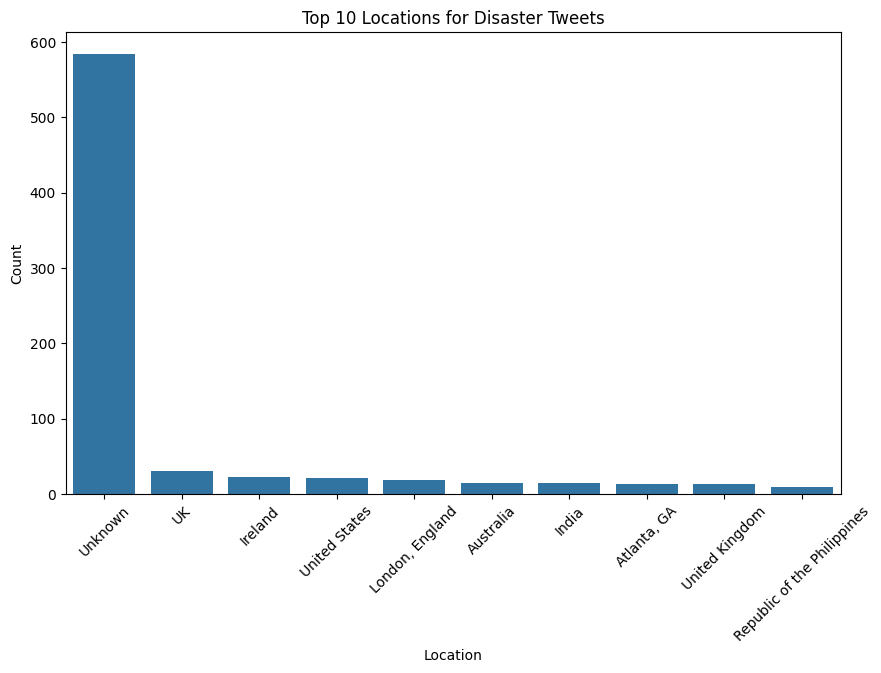

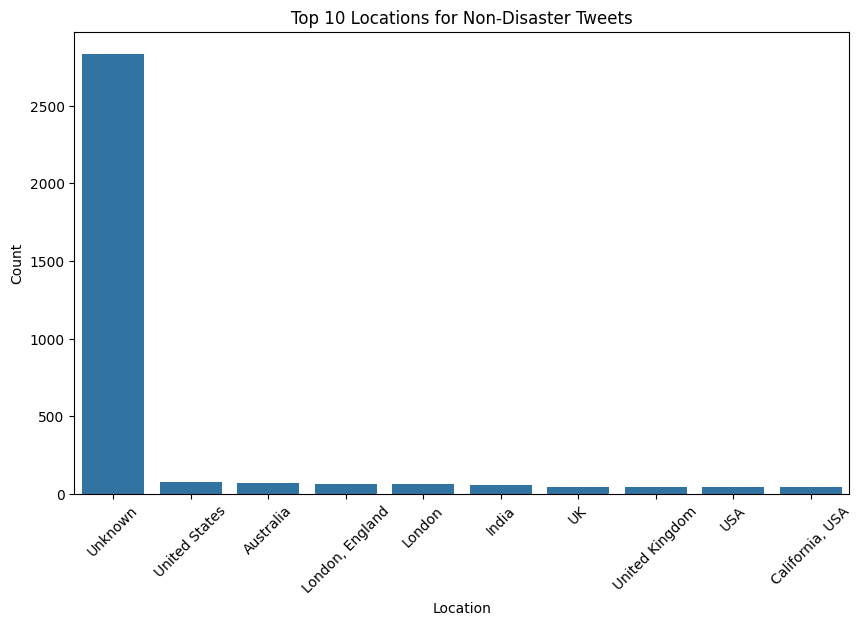

In [13]:
# top 10 locations for disaster tweets
disaster_locations = df[df['target'] == 1]['location'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=disaster_locations.index, y=disaster_locations.values)
plt.title('Top 10 Locations for Disaster Tweets')
plt.ylabel('Count')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.show()

# top 10 locations for non-disaster tweets
non_disaster_locations = df[df['target'] == 0]['location'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=non_disaster_locations.index, y=non_disaster_locations.values)
plt.title('Top 10 Locations for Non-Disaster Tweets')
plt.ylabel('Count')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.show()


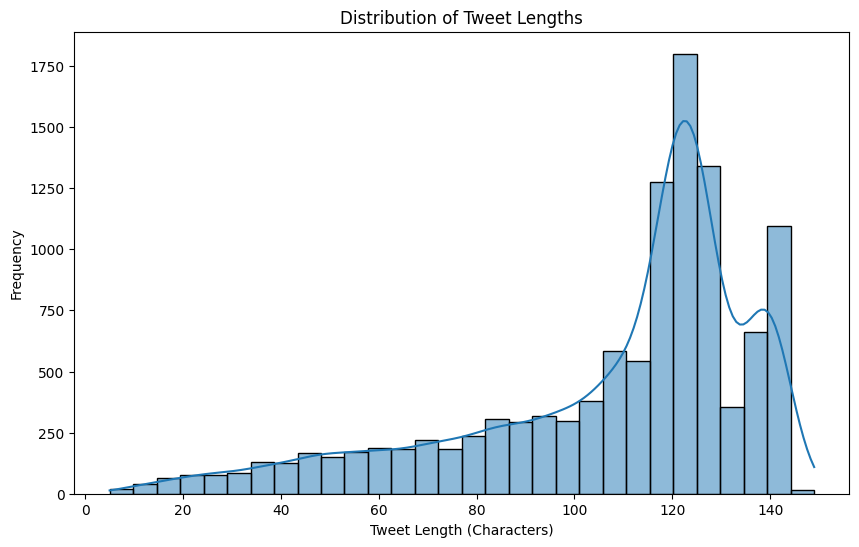

In [14]:
# Add a new column 'tweet_length'
df['tweet_length'] = df['text'].apply(len)

# distribution of tweet lengths
plt.figure(figsize=(10,6))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (Characters)')
plt.ylabel('Frequency')
plt.show()


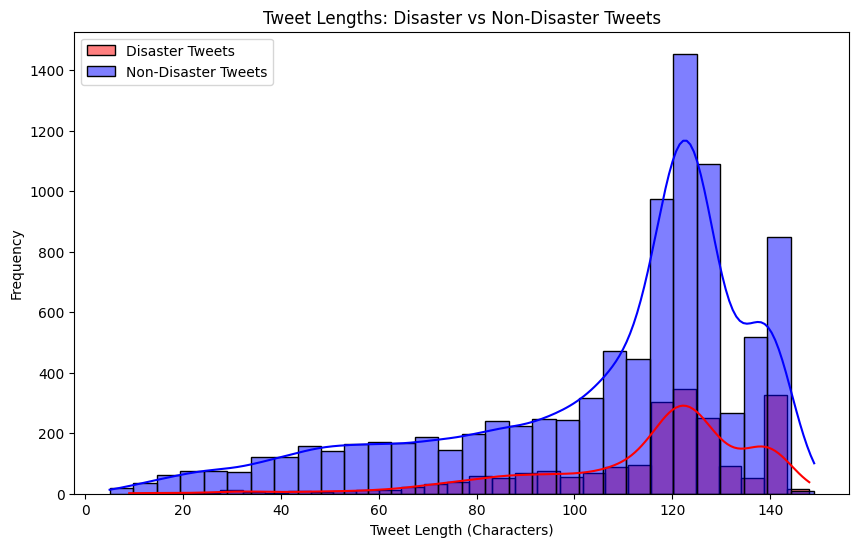

In [15]:
# distribution of tweet lengths for disaster and non-disaster tweets
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 1]['tweet_length'], color='red', label='Disaster Tweets', kde=True, bins=30)
sns.histplot(df[df['target'] == 0]['tweet_length'], color='blue', label='Non-Disaster Tweets', kde=True, bins=30)
plt.title('Tweet Lengths: Disaster vs Non-Disaster Tweets')
plt.xlabel('Tweet Length (Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


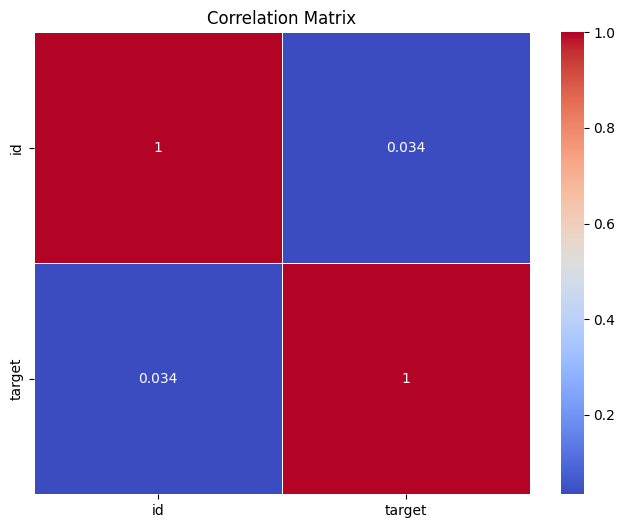

In [11]:
# Fill missing values in 'location' with 'Unknown'
df['location'] = df['location'].fillna('Unknown')
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

